In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [40]:
df_pow = pd.read_pickle('/mnt/data-r6/ahilan/dataset/neoen/process/pow_inv-32-A_5min.pkl')
df_POA = pd.read_pickle('/mnt/data-r6/ahilan/dataset/neoen/process/poa_5min.pkl')
df_Tmod = pd.read_pickle('/mnt/data-r6/ahilan/dataset/neoen/process/tmod_5min.pkl')
df_met = pd.read_pickle('/mnt/data-r6/ahilan/dataset/neoen/process/met_5min.pkl')
df_T = df_met[['Temp','Timestamp']]
df_T = df_T.rename(columns={'Temp': 'Temp','Timestamp': 'time'})


df_inner = pd.merge(df_pow, df_POA, on='time', how='inner')
df_inner2 = pd.merge(df_inner, df_Tmod, on='time', how='inner')
df = pd.merge(df_inner2, df_T, on='time', how='inner')


df.set_index('time', inplace=True)
df = df.rename(columns={'power': 'Power','value_x': 'POA','value_y': 'Tmod' })
df = df[['Power', 'POA', 'Tmod']]
print(df.shape)

(113472, 3)


In [41]:
# Define the morning hour range
start_hour = 6
end_hour = 21

# Filter rows based on morning hour range
df = df[(df.index.hour >= start_hour) & (df.index.hour < end_hour)]
print(df.shape)

(70920, 3)


In [42]:
POA_std = 1000
#Each inverter each with an average of 5,700 modules for a 2 MW nominal maximum power input
#with output AC power limited to 1.7 MW

Capacity = 2.0

df['PR'] = (df['Power'] * POA_std) / (Capacity * df['POA'])

#T_std = 25 
T_avg = df['Tmod'].mean()
alpha = 0.004

df['correction_cofficient'] = (1 - alpha * (T_avg - df['Tmod']))
df['WCPR'] = df['PR']/df['correction_cofficient']
print(df.shape)

(70920, 6)


In [20]:
#Filtering cutailment period
# Define window size (number of hours in the sliding window)
#window_size = 4

# Function to check if all values in the window are the same
#def is_constant(window):
#    return np.all(window == window[0])

# Identify curtailment periods using a rolling window
#df['curtailment'] = df['Power'].rolling(window=window_size, min_periods=1).apply(is_constant)

# Convert rolling result to boolean (1.0 for curtailment, 0.0 for non-curtailment)
#df['curtailment'] = df['curtailment'] == 1.0

# Filter out curtailment periods
#df = df[~df['curtailment']]
#print(df.shape)

In [21]:
#df = df[df['POA']>100]
#print(df.shape)

In [22]:
'''
# Rolling statistics
window_size = 5
df['rolling_mean_POA'] = df['POA'].rolling(window=window_size, center=True).mean()
df['rolling_std_POA'] = df['POA'].rolling(window=window_size, center=True).std()

df['rolling_mean_Power'] = df['Power'].rolling(window=window_size, center=True).mean()
df['rolling_std_Power'] = df['Power'].rolling(window=window_size, center=True).std()

# Filtering outliers using IQA
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for power output and irradiance
Q1_Power = df['Power'].quantile(0.25)
Q3_Power = df['Power'].quantile(0.75)
IQR_Power = Q3_Power - Q1_Power

Q1_POA = df['POA'].quantile(0.25)
Q3_POA = df['POA'].quantile(0.75)
IQR_POA = Q3_POA - Q1_POA

# Define lower and upper bounds for filtering
lower_bound_Power = Q1_Power - 1.5 * IQR_Power
upper_bound_Power = Q3_Power + 1.5 * IQR_Power

lower_bound_POA = Q1_POA - 1.5 * IQR_POA
upper_bound_POA = Q3_POA + 1.5 * IQR_POA

# Filter out data points outside the bounds
df = df[
    (df['Power'] >= lower_bound_Power) & (df['Power'] <= upper_bound_Power) &
    (df['POA'] >= lower_bound_POA) & (df['POA'] <= upper_bound_POA)
]

print(df.shape)
'''

# Identify outliers using roling mean
#deviation_threshold = 2  # 2 standard deviations
#df_filtered = df[
#    (df['Power'] >= df['rolling_mean_Power'] - deviation_threshold * df['rolling_std_Power']) &
#    (df['Power'] <= df['rolling_mean_Power'] + deviation_threshold * df['rolling_std_Power']) &
#    (df['POA'] >= df['rolling_mean_POA'] - deviation_threshold * df['rolling_std_POA']) &
#    (df['POA'] <= df['rolling_mean_POA'] + deviation_threshold * df['rolling_std_POA'])
#]
#
#print(df.shape)

"\n# Rolling statistics\nwindow_size = 5\ndf['rolling_mean_POA'] = df['POA'].rolling(window=window_size, center=True).mean()\ndf['rolling_std_POA'] = df['POA'].rolling(window=window_size, center=True).std()\n\ndf['rolling_mean_Power'] = df['Power'].rolling(window=window_size, center=True).mean()\ndf['rolling_std_Power'] = df['Power'].rolling(window=window_size, center=True).std()\n\n# Filtering outliers using IQA\n# Calculate Q1 (25th percentile) and Q3 (75th percentile) for power output and irradiance\nQ1_Power = df['Power'].quantile(0.25)\nQ3_Power = df['Power'].quantile(0.75)\nIQR_Power = Q3_Power - Q1_Power\n\nQ1_POA = df['POA'].quantile(0.25)\nQ3_POA = df['POA'].quantile(0.75)\nIQR_POA = Q3_POA - Q1_POA\n\n# Define lower and upper bounds for filtering\nlower_bound_Power = Q1_Power - 1.5 * IQR_Power\nupper_bound_Power = Q3_Power + 1.5 * IQR_Power\n\nlower_bound_POA = Q1_POA - 1.5 * IQR_POA\nupper_bound_POA = Q3_POA + 1.5 * IQR_POA\n\n# Filter out data points outside the bounds\ndf 

In [23]:
#from sklearn.impute import KNNImputer
# Create a KNN imputer object
#original_index = df.index

# Select columns to impute
#columns_to_impute = ['Power','POA', 'Tmod']

# Create a KNN imputer object
#knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform only the selected columns
#df_imputed_values = knn_imputer.fit_transform(df[columns_to_impute])

# Convert the result back to a DataFrame and restore the original index
#df = pd.DataFrame(df_imputed_values, columns=columns_to_impute, index=original_index)


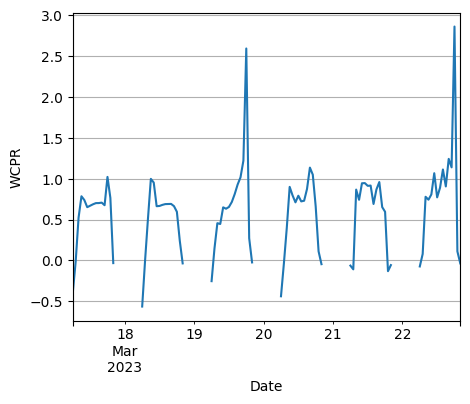

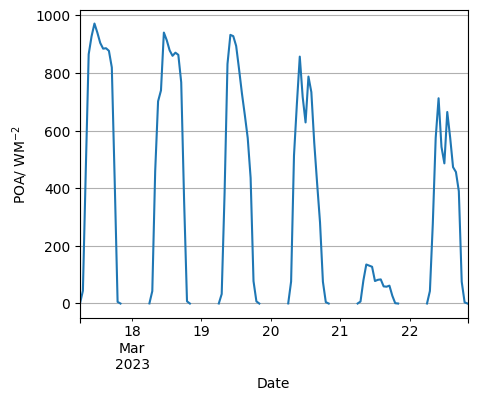

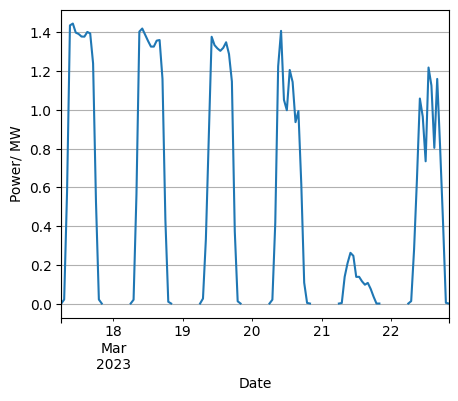

In [43]:
# Define the period you want to plot
start_date = '2023-03-17'
end_date = '2023-03-22'

# Slice the DataFrame based on the specified period
df_period = df[start_date:end_date]

df_period['WCPR'].resample('H').mean().plot(figsize=(5, 4))
plt.ylabel('WCPR')
plt.xlabel('Date')
plt.grid(True)
plt.show()

df_period['POA'].resample('H').mean().plot(figsize=(5, 4))
plt.ylabel('POA/ WM$^{-2}$')
plt.xlabel('Date')
plt.grid(True)
plt.show()

df_period['Power'].resample('H').mean().plot(figsize=(5, 4))
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [25]:
df.shape

(70920, 6)

In [53]:
#WCPR filtering
df_filter = df[df['WCPR'] > 0.4]
df_filter = df_filter[df_filter['WCPR'] <= 1.2]
print(df_filter.shape)

(19844, 6)


In [54]:
df.describe()

,Power,POA,Tmod,PR,correction_cofficient,WCPR
count,7.092000e+04,70920.000000,70920.000000,6.674600e+04,70920.000000,6.674600e+04
mean,4.654560e-01,351.875274,22.114473,inf,1.000000,inf
std,5.792471e-01,408.365855,17.491678,NaN,0.069967,NaN
min,0.000000e+00,-1.139593,-6.118014,-1.501071e+04,0.887070,-1.611130e+04
25%,5.537983e-10,0.000000,7.003448,0.000000e+00,0.939556,0.000000e+00
50%,8.390867e-02,129.100600,20.385220,3.531529e-01,0.993083,3.408303e-01
75%,1.005577e+00,711.382500,35.893890,8.883774e-01,1.055118,8.612395e-01
max,1.700452e+00,1502.591000,68.853870,inf,1.186958,inf


In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Example: Generate synthetic time series data (replace with your own data loading)
np.random.seed(42)

# Define the period you want to plot
start_date = df.index.min()
end_date = df.index.max()

temp = df_filter[start_date:end_date][['WCPR']].resample('5min').mean()
print(temp.isnull().any().any())
print(np.any(np.isinf(temp)))
print(temp.shape)
temp_cleaned = temp.dropna()
print(temp_cleaned.shape)
data = temp_cleaned.values
print(temp_cleaned.index)

True
False
(85661, 1)
(19844, 1)
DatetimeIndex(['2023-03-16 08:35:00', '2023-03-16 08:40:00',
               '2023-03-16 08:45:00', '2023-03-16 08:50:00',
               '2023-03-16 08:55:00', '2023-03-16 09:00:00',
               '2023-03-16 09:05:00', '2023-03-16 09:10:00',
               '2023-03-16 09:15:00', '2023-03-16 09:20:00',
               ...
               '2024-01-07 17:55:00', '2024-01-07 18:05:00',
               '2024-01-07 18:10:00', '2024-01-07 18:15:00',
               '2024-01-07 18:20:00', '2024-01-07 18:25:00',
               '2024-01-07 18:40:00', '2024-01-07 18:45:00',
               '2024-01-07 18:50:00', '2024-01-07 18:55:00'],
              dtype='datetime64[ns]', name='time', length=19844, freq=None)


In [56]:
# Normalize the data
#data_mean = np.mean(data)
#data_std = np.std(data)
#data_normalized = (data - data_mean) / data_std


# Normalize data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [57]:
# Create sequences/windows
'''
timesteps = 5 # Length of each sequence/window
num_sequences = len(data_normalized) - timesteps + 1

# Initialize an array to hold the sequences
sequences = np.zeros((num_sequences, timesteps, 1))

for i in range(num_sequences):
    sequences[i] = data_normalized[i:i + timesteps].reshape(-1, 1)

# Print the shape of the resulting three-dimensional array
print("Shape of the sequences array:", sequences.shape)
'''


# Create sequences for LSTM
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps):
        seq = data[i:i + timesteps]
        sequences.append(seq)
    return np.array(sequences)


# Train-test split
#X_train, X_test = train_test_split(sequences, test_size=0.2, random_state=42)


# Define the split ratio
train_ratio = 1.0
test_ratio = 0.0
num_train_samples = int(train_ratio * len(data_normalized))

# Split the data
train_data = data_normalized[:num_train_samples]
test_data = data_normalized[num_train_samples:]

train_data_date = temp_cleaned.index[:num_train_samples]
test_data_date = temp_cleaned.index[num_train_samples:]


timesteps = 30  # Example sequence length
train_sequences = create_sequences(train_data, timesteps)
test_sequences = create_sequences(test_data, timesteps)

print("Shape of the train sequences array:", train_sequences.shape)
print("Shape of the test sequences array:", test_sequences.shape)


Shape of the train sequences array: (19814, 30, 1)
Shape of the test sequences array: (0,)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 30, 1)]              0         []                            
                                                                                                  
 lstm_4 (LSTM)               (None, 128)                  66560     ['input_3[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 128)                  16512     ['lstm_4[0][0]']              
                                                                                                  
 dense_11 (Dense)            (None, 10)                   1290      ['dense_10[0][0]']            
                                                                                            

KeyError: 'val_loss'

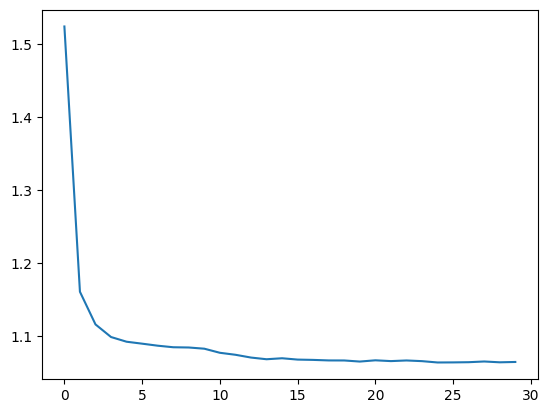

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

# Function to sample from the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Hyperparameters
input_dim = 1   
latent_dim = 10  
intermediate_dim = 128
dropout_rate = 0

# Encoder
inputs = Input(shape=(timesteps, input_dim))
h = LSTM(intermediate_dim, return_sequences=False,dropout=dropout_rate, recurrent_dropout=dropout_rate)(inputs)
h = Dense(intermediate_dim, activation='relu')(h)

z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_repeat = RepeatVector(timesteps)
decoder_lstm = LSTM(intermediate_dim, return_sequences=True, dropout=dropout_rate, recurrent_dropout=dropout_rate)
decoder_output = TimeDistributed(Dense(input_dim))


h_decoded = decoder_repeat(z)
x_decoded_mean = decoder_lstm(h_decoded)
x_decoded_mean = decoder_output(x_decoded_mean)


# VAE model
vae = Model(inputs, x_decoded_mean)

# Loss function
reconstruction_loss = mse(K.flatten(inputs), K.flatten(x_decoded_mean))
reconstruction_loss *= timesteps * input_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + 0.15*kl_loss)
vae.add_loss(vae_loss)

# Compile model
#vae.compile(optimizer='rmsprop')
optimizer = Adam(learning_rate=0.0005)
vae.compile(optimizer=optimizer)
vae.summary()


# Train the VAE with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = vae.fit(train_sequences, epochs=30, batch_size=64, validation_split=0.0, callbacks=[early_stopping])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Encode and decode some data points
encoder = Model(inputs, z_mean)
encoded_data = encoder.predict(train_sequences)

# Display some of the encoded data
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Encoded Data")
plt.show()


# Extract latent representations and reconstructed sequences
#reconstructed_sequences = vae.predict(X_train)

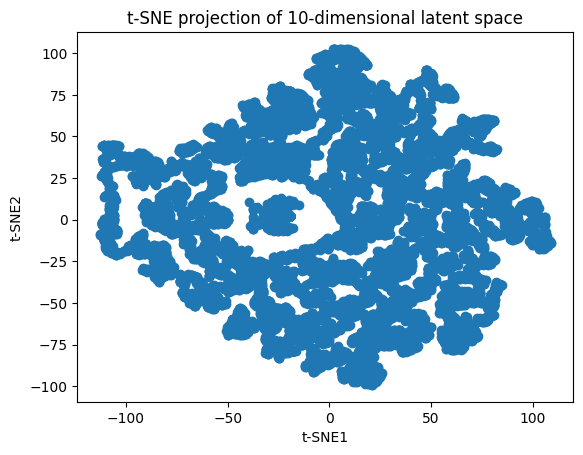

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(encoded_data)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE projection of 10-dimensional latent space')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [35]:
data = train_data
data_sequences = train_sequences
date_index = train_data_date

reconstructed_sequences = vae.predict(data_sequences)

# 1. Reshape sequences back to original form
original_shape = (len(data), 1)
reconstructed_original_data = np.zeros(original_shape)
reconstructed_vae_data = np.zeros(original_shape)

for i in range(len(data_sequences) - timesteps):
    reconstructed_original_data[i:i + timesteps] = data_sequences[i]
    reconstructed_vae_data[i:i + timesteps] = reconstructed_sequences[i]


X_test_original = scaler.inverse_transform(reconstructed_original_data)
X_test_vae = scaler.inverse_transform(reconstructed_vae_data)

df_orginal = pd.DataFrame(data = X_test_original, index = date_index, columns = ['WCPR'])
df_vae_output = pd.DataFrame(data = X_test_vae, index = date_index, columns = ['WCPR'])


514/514 [==============================] - 17s 30ms/step


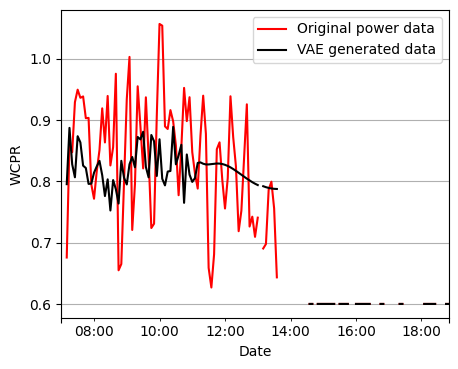

"\ndf_period['POA'].resample('H').mean().plot(figsize=(5, 4))\nplt.ylabel('POA/ WM$^{-2}$')\nplt.xlabel('Date')\nplt.grid(True)\nplt.show()\n\ndf_period['Power'].resample('H').mean().plot(figsize=(5, 4))\nplt.ylabel('Power/ MW')\nplt.xlabel('Date')\nplt.grid(True)\nplt.show()\n"

In [38]:
# Define the period you want to plot
start_date = '2024-01-07'
end_date = '2024-01-08'

# Slice the DataFrame based on the specified period
df_orginal_period = df_orginal[start_date:end_date]
df_vae_output_period = df_vae_output[start_date:end_date]


df_orginal_period['WCPR'].resample('5min').mean().plot(figsize=(5, 4), color =['Red'],label='Original power data')
df_vae_output_period['WCPR'].resample('5min').mean().plot(figsize=(5, 4),color =['Black'],label='VAE generated data')
plt.ylabel('WCPR')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()



'''
df_period['POA'].resample('H').mean().plot(figsize=(5, 4))
plt.ylabel('POA/ WM$^{-2}$')
plt.xlabel('Date')
plt.grid(True)
plt.show()

df_period['Power'].resample('H').mean().plot(figsize=(5, 4))
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.grid(True)
plt.show()
'''

In [166]:
data = test_data
data_sequences = test_sequences
date_index = test_data_date

# Calculate reconstruction loss
reconstructed_sequences = vae.predict(data_sequences)
reconstruction_errors = np.mean(np.square(data_sequences - reconstructed_sequences), axis=(1, 2))

# Threshold for anomaly detection
threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)
print(threshold)

anomalies = reconstruction_errors > threshold

# Mark anomalies in the original data
df_vae_output['Anomaly'] = 0
df_vae_output['Anomaly'][timesteps:] = anomalies


443/443 [==============================] - 16s 36ms/step
0.04758400445804291


/tmp/ipykernel_2500201/2442981538.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vae_output['Anomaly'][timesteps:] = anomalies


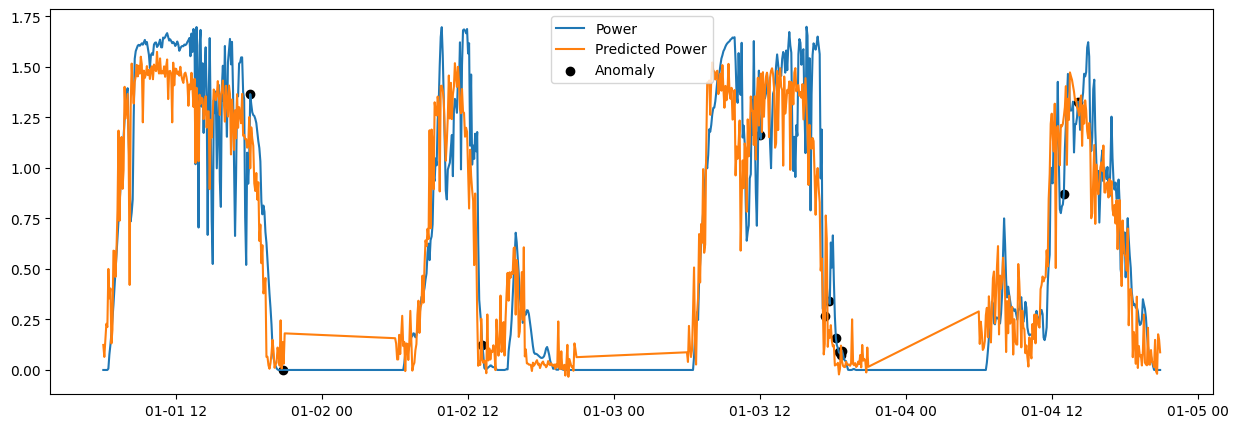

In [165]:
# Define the period you want to plot
start_date = '2024-01-01'
end_date = '2024-01-04'

# Slice the DataFrame based on the specified period
df_orginal_period = df_orginal[start_date:end_date]
df_vae_output_period = df_vae_output[start_date:end_date]

plt.figure(figsize=(15, 5))
plt.plot(df_orginal_period.index, df_orginal_period['Power'], label='Power')
plt.plot(df_vae_output_period.index, df_vae_output_period['Power'], label='Predicted Power')
plt.scatter(df_vae_output_period.index[df_vae_output_period['Anomaly'] == 1], df_orginal_period['Power'][df_vae_output['Anomaly'] == 1], color='black', label='Anomaly')
plt.legend()
plt.show()

In [105]:
reconstructed_sequences = vae.predict(X_train)
reconstruction_errors = np.mean(np.square(X_train - reconstructed_sequences), axis=(1, 2))

# Threshold for anomaly detection
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)

anomalies = reconstruction_errors > threshold

df['Anomaly'] = 0
df['Anomaly'][time_steps:] = anomalies


# Visualize anomalies
plt.figure(figsize=(14, 6))
plt.plot(reconstruction_errors, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

2216/2216 [==============================] - 72s 33ms/step


NameError: name 'X_test' is not defined

73/73 [==============================] - 1s 5ms/step


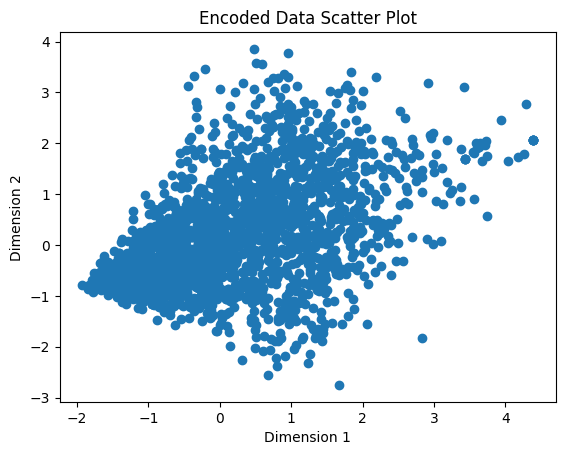

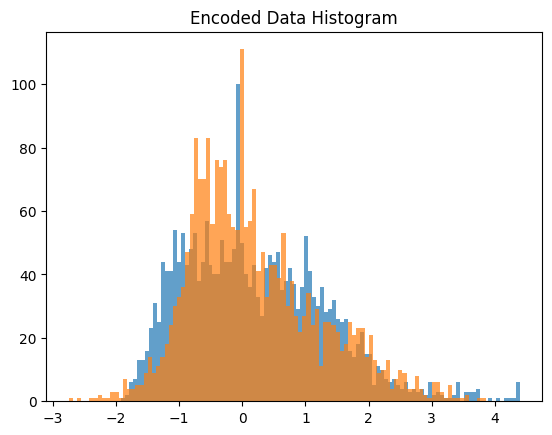

73/73 [==============================] - 2s 8ms/step


In [277]:
# Encode and decode some data points
encoder = Model(inputs, z_mean)
encoded_data = encoder.predict(X_train)

# Display some of the encoded data
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Encoded Data Scatter Plot")
plt.show()

plt.hist(encoded_data[:, 0], bins=100, alpha=0.7, label='Feature 1')
plt.hist(encoded_data[:, 1], bins=100, alpha=0.7, label='Feature 2')
plt.title("Encoded Data Histogram")
plt.show()

# Extract latent representations and reconstructed sequences
reconstructed_sequences = vae.predict(X_train)

(2318, 1)
(2318, 1)


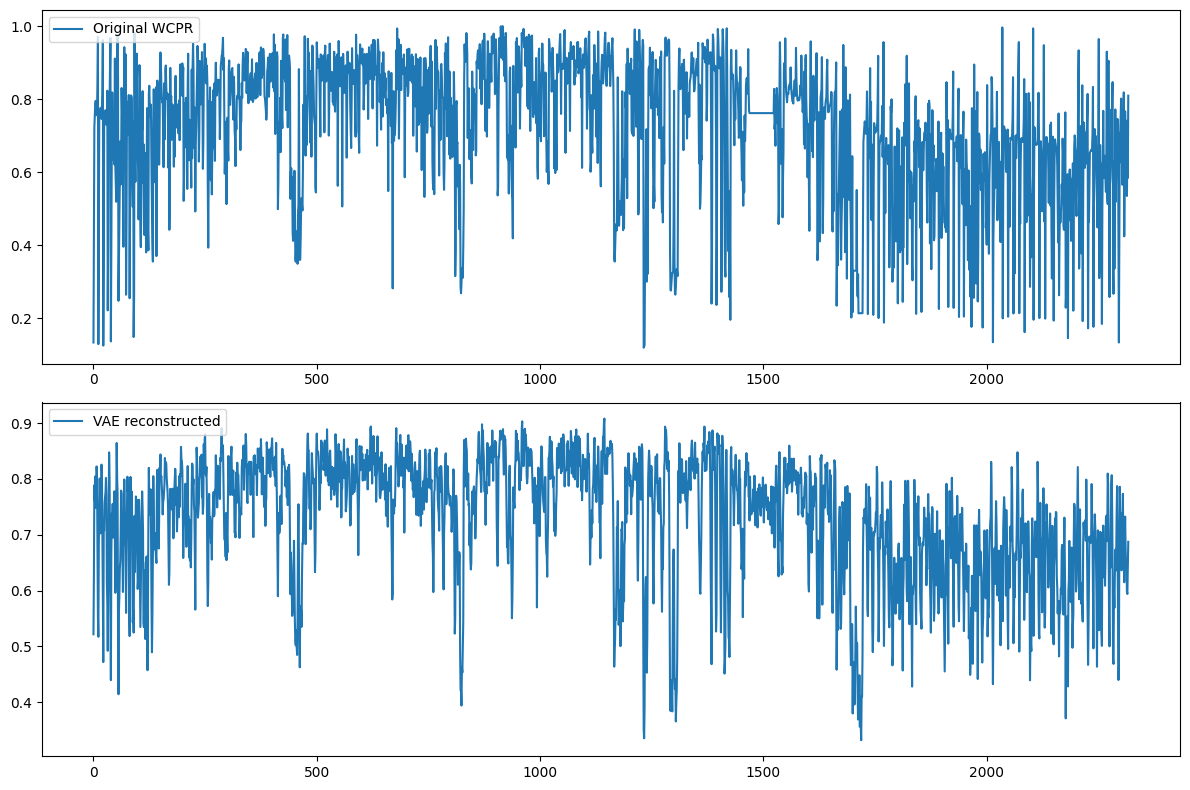

In [278]:
# Plot original vs. reconstructed time series
#(reconstructed_sequences * data_std) + data_mean

# 1. Reshape sequences back to original form
original_shape = (len(data_normalized), 1)
reconstructed_original_data = np.zeros(original_shape)
reconstructed_vae_data = np.zeros(original_shape)

for i in range(num_sequences):
    reconstructed_original_data[i:i + timesteps] = sequences[i]
    reconstructed_vae_data[i:i + timesteps] = reconstructed_sequences[i]


reconstructed_original_data_no_norm = (reconstructed_original_data * data_std) + data_mean
reconstructed_vae_data_no_norm = (reconstructed_vae_data * data_std) + data_mean

print(reconstructed_original_data_no_norm.shape)
print(reconstructed_vae_data_no_norm.shape)

temp_cleaned['original'] = reconstructed_original_data_no_norm
temp_cleaned['vae_constructed'] = reconstructed_vae_data_no_norm


# Plotting the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(211)
plt.plot(temp_cleaned['original'], label='Original WCPR')
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(temp_cleaned['vae_constructed'], label='VAE reconstructed')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()